<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/12_lstm_long_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM (Long Distance Problem)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
def get_label(x, i1, i2, i3):
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0


N = 5000
T = 30
D = 1
X = []
y = []
for _ in range(N):
    x = np.random.randn(T)
    X.append(x)
    y.append(get_label(x, 0, 1, 2))
X = np.asarray(X).reshape(-1, T, D)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Epoch 1/100
105/105 [==============================] - 1s 9ms/step - loss: 0.6952 - accuracy: 0.4899 - val_loss: 0.6935 - val_accuracy: 0.4873
Epoch 2/100
105/105 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.6927 - val_accuracy: 0.5061
Epoch 3/100
105/105 [==============================] - 1s 7ms/step - loss: 0.6916 - accuracy: 0.5328 - val_loss: 0.6898 - val_accuracy: 0.5521
Epoch 4/100
105/105 [==============================] - 1s 6ms/step - loss: 0.6803 - accuracy: 0.5496 - val_loss: 0.6654 - val_accuracy: 0.5533
Epoch 5/100
105/105 [==============================] - 1s 6ms/step - loss: 0.6553 - accuracy: 0.5839 - val_loss: 0.6407 - val_accuracy: 0.6158
Epoch 6/100
105/105 [==============================] - 1s 7ms/step - loss: 0.6277 - accuracy: 0.6179 - val_loss: 0.6114 - val_accuracy: 0.6279
Epoch 7/100
105/105 [==============================] - 1s 7ms/step - loss: 0.5979 - accuracy: 0.6469 - val_loss: 0.5805 - val_accuracy: 0.6800

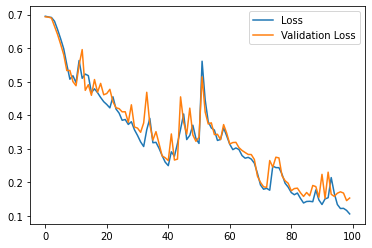

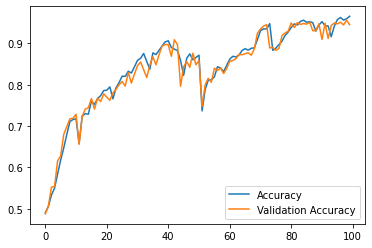

52/52 [==============================] - 0s 1ms/step - loss: 0.1530 - accuracy: 0.9455
Accuracy: 0.9454545378684998


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(T, D)),
    tf.keras.layers.LSTM(5, return_sequences=True),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')